<a href="https://colab.research.google.com/github/KhrTim/AI-application-systems/blob/main/Weekly_sessions/week10/week_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image

In [12]:
!pip install validators matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=be8b1ee8b6dfdc421550232a1655467885533225904582604c8ea9d9384f393d
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!curl https://www.campuscommonspethospital.com/wp-content/uploads/2016/07/AdobeStock_80896811.jpeg --output dog.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1832k  100 1832k    0     0  2734k      0 --:--:-- --:--:-- --:--:-- 2730k


In [ ]:
# Load and process the Image
image = Image.open("dog.jpeg")
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456,0.406], std=[0.229, 0.224, 0.225])
]) # Parameters recommended by pytorch.org
input_tensor = preprocess(image)

# Convert to 4-dimensional tensor
inputs = input_tensor.unsqueeze(0)

In [13]:
# Load the pre-trained model
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V1)
model.eval()

# Transfer model to GPU
model.to(device)

# Prediction process
inputs = inputs.to(device)
with torch.no_grad():
  outputs = model(inputs)

# Convert to probabilities, since final SoftMax activation is not in pretrained model
probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

# Print class ID for top 5 predictions
_, indices = torch.sort(probabilities, descending=True)
for i in range(0,5):
  print("Image class:", indices[i].item(), ", probability = %4.3f" % probabilities[indices[i]].item())

Image class: 232 , probability = 0.649
Image class: 231 , probability = 0.131
Image class: 200 , probability = 0.110
Image class: 193 , probability = 0.018
Image class: 199 , probability = 0.010


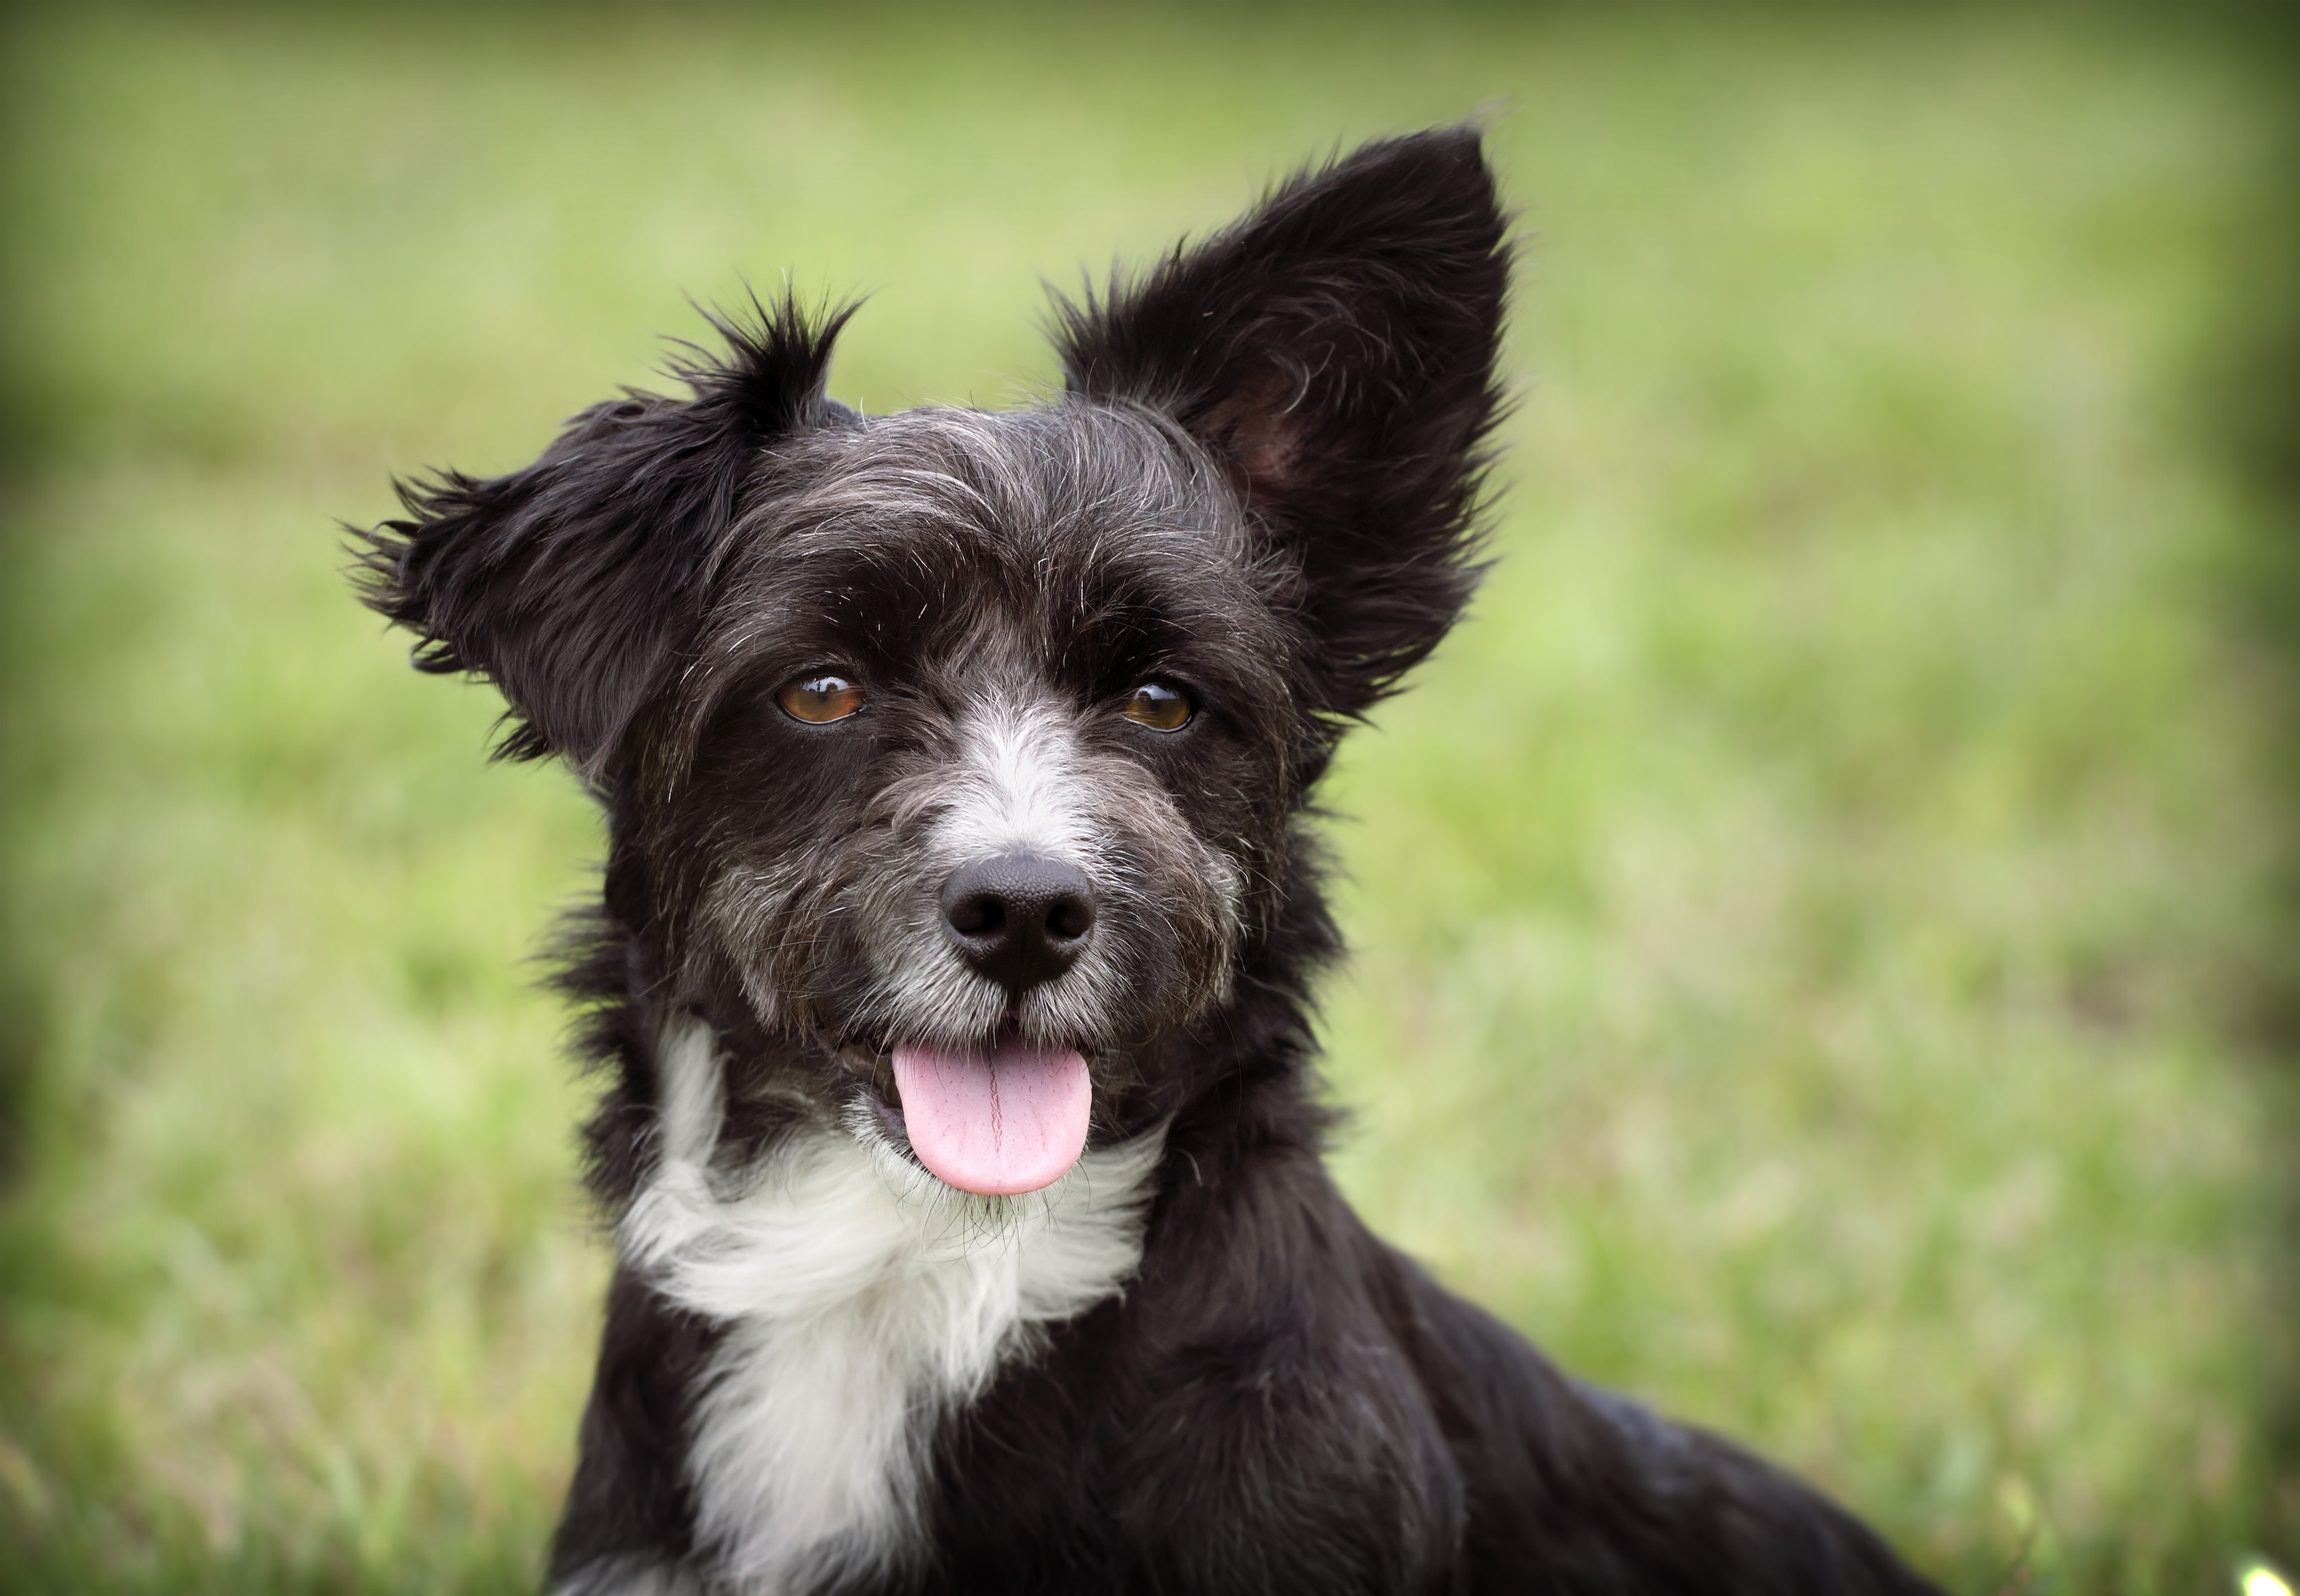

In [9]:
display(image)